# Використання SQL в Python<br>
Using SQL in Python

In [1]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime
!pip install mysql-connector-python

1.Cтворюємо підключення до бази даних employees.<br>
We create a connection to the employees database.

In [3]:
con = mysql.connector.connect(user='user1', password="7oygWy6P",
                              host='3.68.62.36',
                              database='employees')

2.Вибираємо максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Отримуємо результати в кінці, виконуючи `cursor.fetchall()`.<br>
We select the maximum and minimum dates of hiring employees using `con.cursor()`. We get the results at the end by executing `cursor.fetchall()`.

In [3]:
cursor = con.cursor()
sql= "select max(hire_date), min(hire_date) from employees"
cursor.execute(sql)
results = cursor.fetchall()
print(results)

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]


In [20]:
cursor.close()

True

3.Збираємо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` вибираємо `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.<br>
Результат записуємо у pandas DataFrame, який зберігаємо у змінну `res`.

We collect information about the last salary of each employee in the database. Using `con.cursor()`, we select `salaries` for each employee, his number, the latest in the database (that is, the one corresponding to the latest `to_date`) salary, and the values ​​`from_date`, `to_date` for this salary.

We record the result in a pandas DataFrame, which we store in the `res' variable.

In [4]:
import pandas as pd
cursor= con.cursor()
sql="Select emp_no, salary, from_date, to_date  From salaries Where (emp_no, to_date) in (select emp_no, max(to_date) from salaries group by emp_no)"
cursor.execute(sql)
res=pd.DataFrame(cursor.fetchall(), columns = [i[0] for i in cursor.description])
print(res.columns)
print(res.shape)
display(res.head(3))

Index(['emp_no', 'salary', 'from_date', 'to_date'], dtype='object')
(300180, 4)


,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01


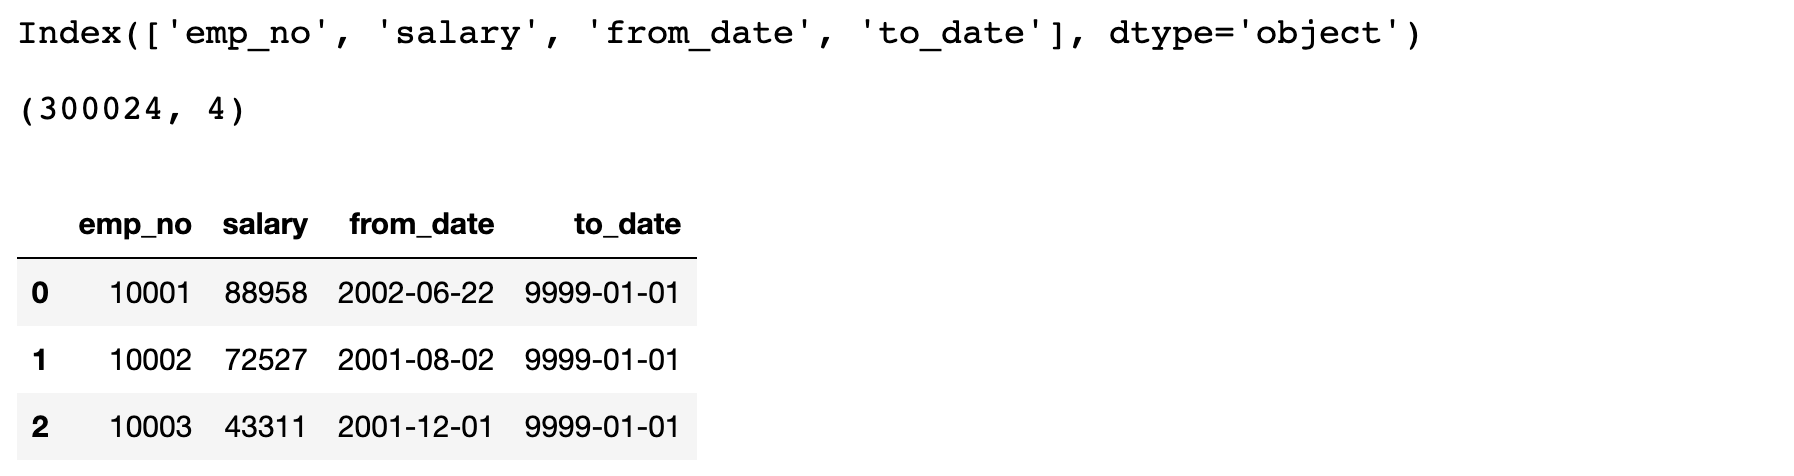

4. В утвореній вибірці в змінній `res` рахуємо значення `to_date` рівні `9999-01-01`,і рахуємо скільки ні. Визначаємл тип даних у значень колонки `to_date`.<br>
In the created sample, in the `res` variable, we count the value of `to_date` equal to `9999-01-01`, and count how many are not. Define the data type in the values of the `to_date' column.

In [5]:
print(res['to_date'].dtype)

object


In [6]:
res["to_date"] = res["to_date"].astype(str).str.strip()
equal=(res["to_date"] == "9999-01-01").sum()
not_equal = len(res)-equal
print(f"Виходить що рівних 9999-01-01 = {equal} та навпаки не рівних = {not_equal}")
print(f"It turns out that equal 9999-01-01 = {equal} and vice versa not equal = {not_equal}")

Виходить що рівних 9999-01-01 = 240124 та навпаки не рівних = 60056


5. Виводимо розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01.

We derive the distribution (histogram) of salaries of employees who still work in the company, using the result of the previous task. Employees who are still working in the company are those whose to_date is 9999-01-01.

In [7]:
from matplotlib import pyplot as plt 

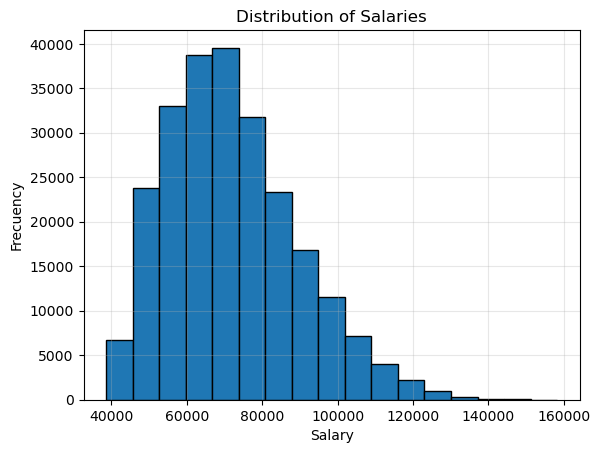

In [8]:
salaries = res[res["to_date"]== "9999-01-01"]["salary"]
plt.hist(salaries, bins=17, edgecolor='black')
plt.grid(axis='both', alpha=.3)
plt.xlabel("Salary")
plt.ylabel("Frecuency")
plt.title("Distribution of Salaries")
plt.show()

6.Виводимо кількість співробітників за роком, в який вони були найняті (`hire_date`) використовуючи `pandas.read_sql`.<br>
We output the number of employees by the year in which they were hired (`hire_date`) using `pandas.read_sql`.

In [9]:
df = pd.read_sql(f"Select year(hire_date) as hire_year, count(*) as emp_num from employees group by hire_year", con)
display(df)

C:\Users\elena\AppData\Local\Temp\ipykernel_1152\1710101331.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"Select year(hire_date) as hire_year, count(*) as emp_num from employees group by hire_year", con)


,hire_year,emp_num
0,1986,36150
1,1985,35316
2,1989,28394
3,1994,14835
4,1990,25610
5,1992,20402
6,1987,33501
7,1995,12115
8,1993,17772
9,1999,1514


7. Виводимо лінійний графік залежності кількості найманих співробітників від року найму.<br>
We derive a linear graph of the dependence of the number of hired employees on the year of hiring.

C:\Users\elena\AppData\Local\Temp\ipykernel_1152\3751450679.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  frequency_of_hiring = pd.read_sql(f"select year(hire_date) as hire_year, count(*) as emp_num from employees group by hire_year order by hire_year asc", con)


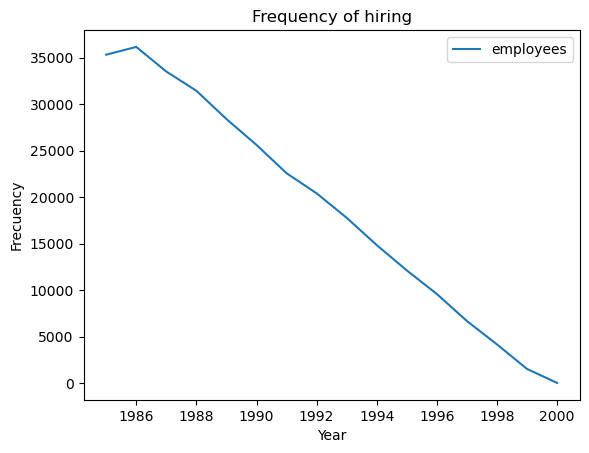

In [18]:
frequency_of_hiring = pd.read_sql(f"select year(hire_date) as hire_year, count(*) as emp_num from employees group by hire_year order by hire_year asc", con)
plt.plot(frequency_of_hiring["hire_year"], frequency_of_hiring["emp_num"],label="employees")
plt.title("Frequency of hiring")
plt.xlabel("Year")
plt.ylabel("Frecuency")
plt.legend()

8. З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знаходимо кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції отримуємо з використанням функції `timestampdiff`.

With the help of SQL, we find the number of full years of stay in the position for workers of the ``Engineer'' position who no longer work in the company (that is, they have a to_date value that is NOT filled with the default value). The position is stored in the `title` column in the `titles` table. The number of years of stay in the position is obtained using the `timestampdiff` function.

In [24]:
df_years = pd.read_sql("SELECT TIMESTAMPDIFF(YEAR, from_date, to_date) AS duration, from_date, to_date FROM titles WHERE title = 'Engineer' AND to_date != '9999-01-01'", con)
display(df_years)

C:\Users\elena\AppData\Local\Temp\ipykernel_1152\219075605.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_years = pd.read_sql("SELECT TIMESTAMPDIFF(YEAR, from_date, to_date) AS duration, from_date, to_date FROM titles WHERE title = 'Engineer' AND to_date != '9999-01-01'", con)


,duration,from_date,to_date
0,9,1986-12-01,1995-12-01
1,5,1990-02-18,1995-02-18
2,8,1992-12-18,2000-12-18
3,8,1987-04-03,1995-04-03
4,5,1995-03-20,2001-03-19
...,...,...,...
84015,9,1989-11-23,1998-11-23
84016,5,1989-07-30,1994-07-30
84017,0,1993-02-22,1993-10-27
84018,6,1996-05-13,2002-05-13


9. Використовуючи дані в  `df_years`, будуємо гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції.<br>
Using the data in df_years, we build a histogram of the number of years that people with the position name `Engineer' have been in the position.

Text(0, 0.5, 'Numer of employees')

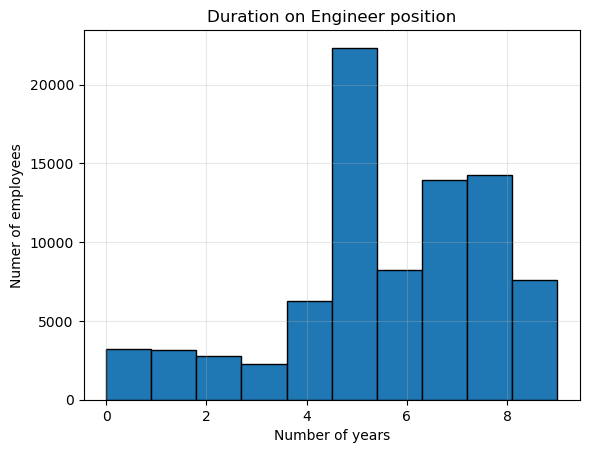

In [31]:
plt.hist(df_years["duration"], edgecolor= "black")
plt.grid(axis='both', alpha=.3)
plt.title("Duration on Engineer position")
plt.xlabel("Number of years")
plt.ylabel("Numer of employees")

In [32]:
con.close()